In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/content/Heartds.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
5,0,43,2,0,0,0,0,1,0,228,180.0,110.0,30.30,77,99,0
6,0,63,1,0,0,0,0,0,0,205,138.0,71.0,33.11,60,85,1
7,0,45,2,1,20,0,0,0,0,313,100.0,71.0,21.68,79,78,0
8,1,52,1,0,0,0,0,1,0,260,141.5,89.0,26.36,76,79,0
9,1,43,1,1,30,0,0,1,0,225,162.0,107.0,23.61,93,88,0


In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [4]:
#Features and target Variable
X=data.iloc[:,:-1]
Y=data.iloc[:,:-1]


In [5]:
X = data.drop(columns=['TenYearCHD'])  # Features
y = data['TenYearCHD']  # Target


In [6]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
scaler = StandardScaler()
continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


In [8]:
# Step 3: Apply Linear Regression
# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)


In [9]:
# Step 4: Evaluation Metrics
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [10]:
# Display the results
print("\nLinear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Metrics:
Mean Squared Error (MSE): 0.3364
Mean Absolute Error (MAE): 0.4555
R² Score: -1.4224


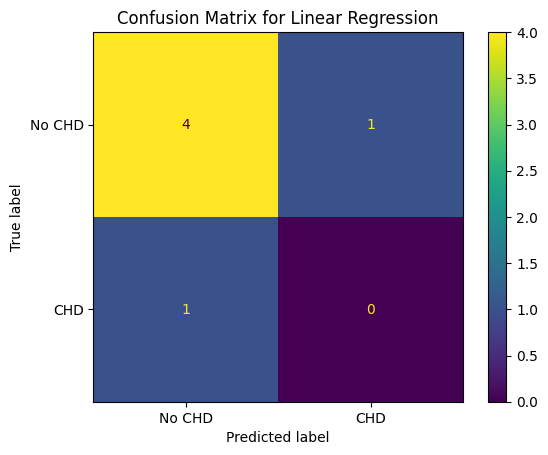

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
# Assuming y_pred contains continuous predictions, convert to binary classes
threshold = 0.5  # Choose an appropriate threshold
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No CHD', 'CHD'])
disp.plot()
plt.title('Confusion Matrix for Linear Regression')
plt.show()

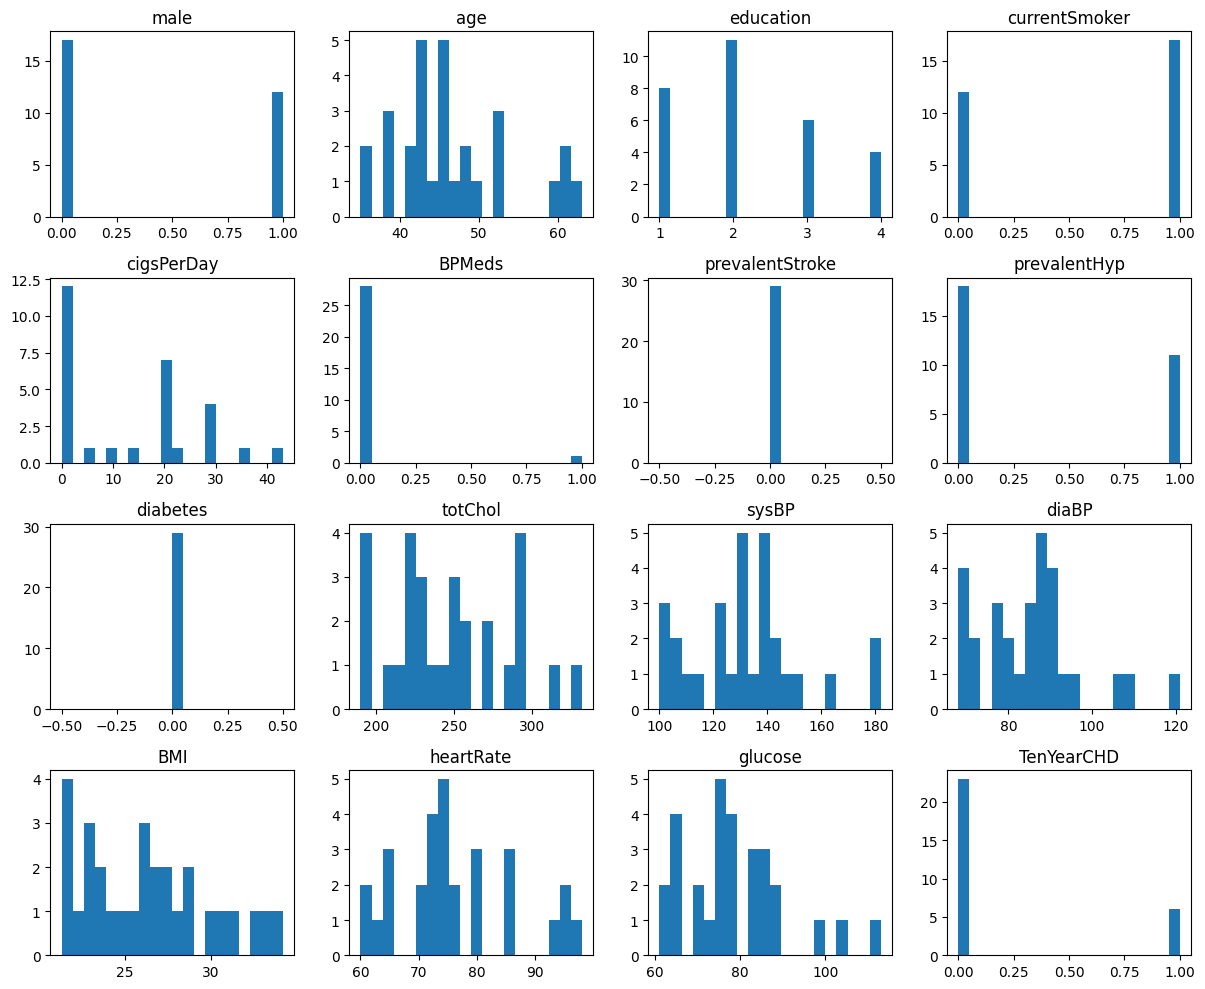

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
data.hist(figsize=(12, 10), bins=20, grid=False)
plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

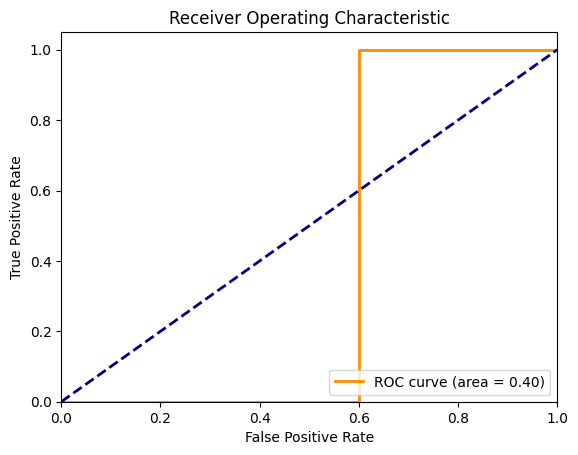

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test (true labels) and y_pred (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

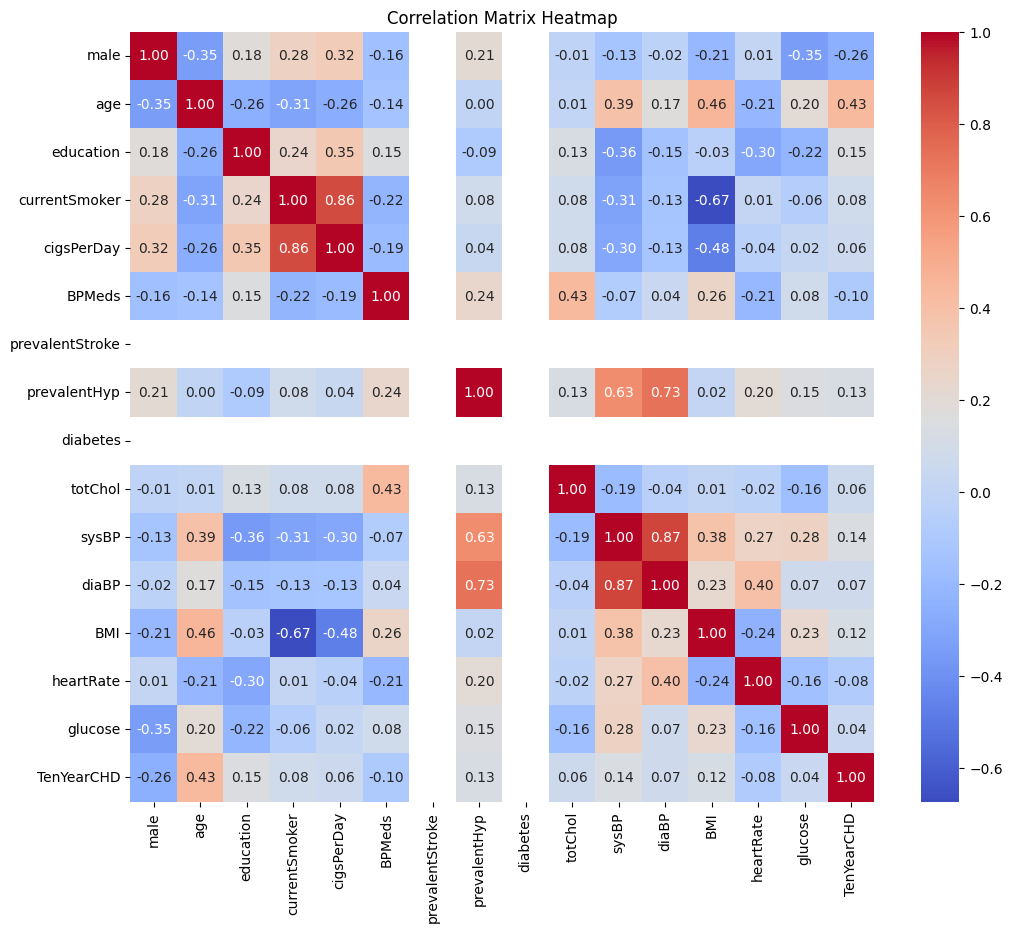

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

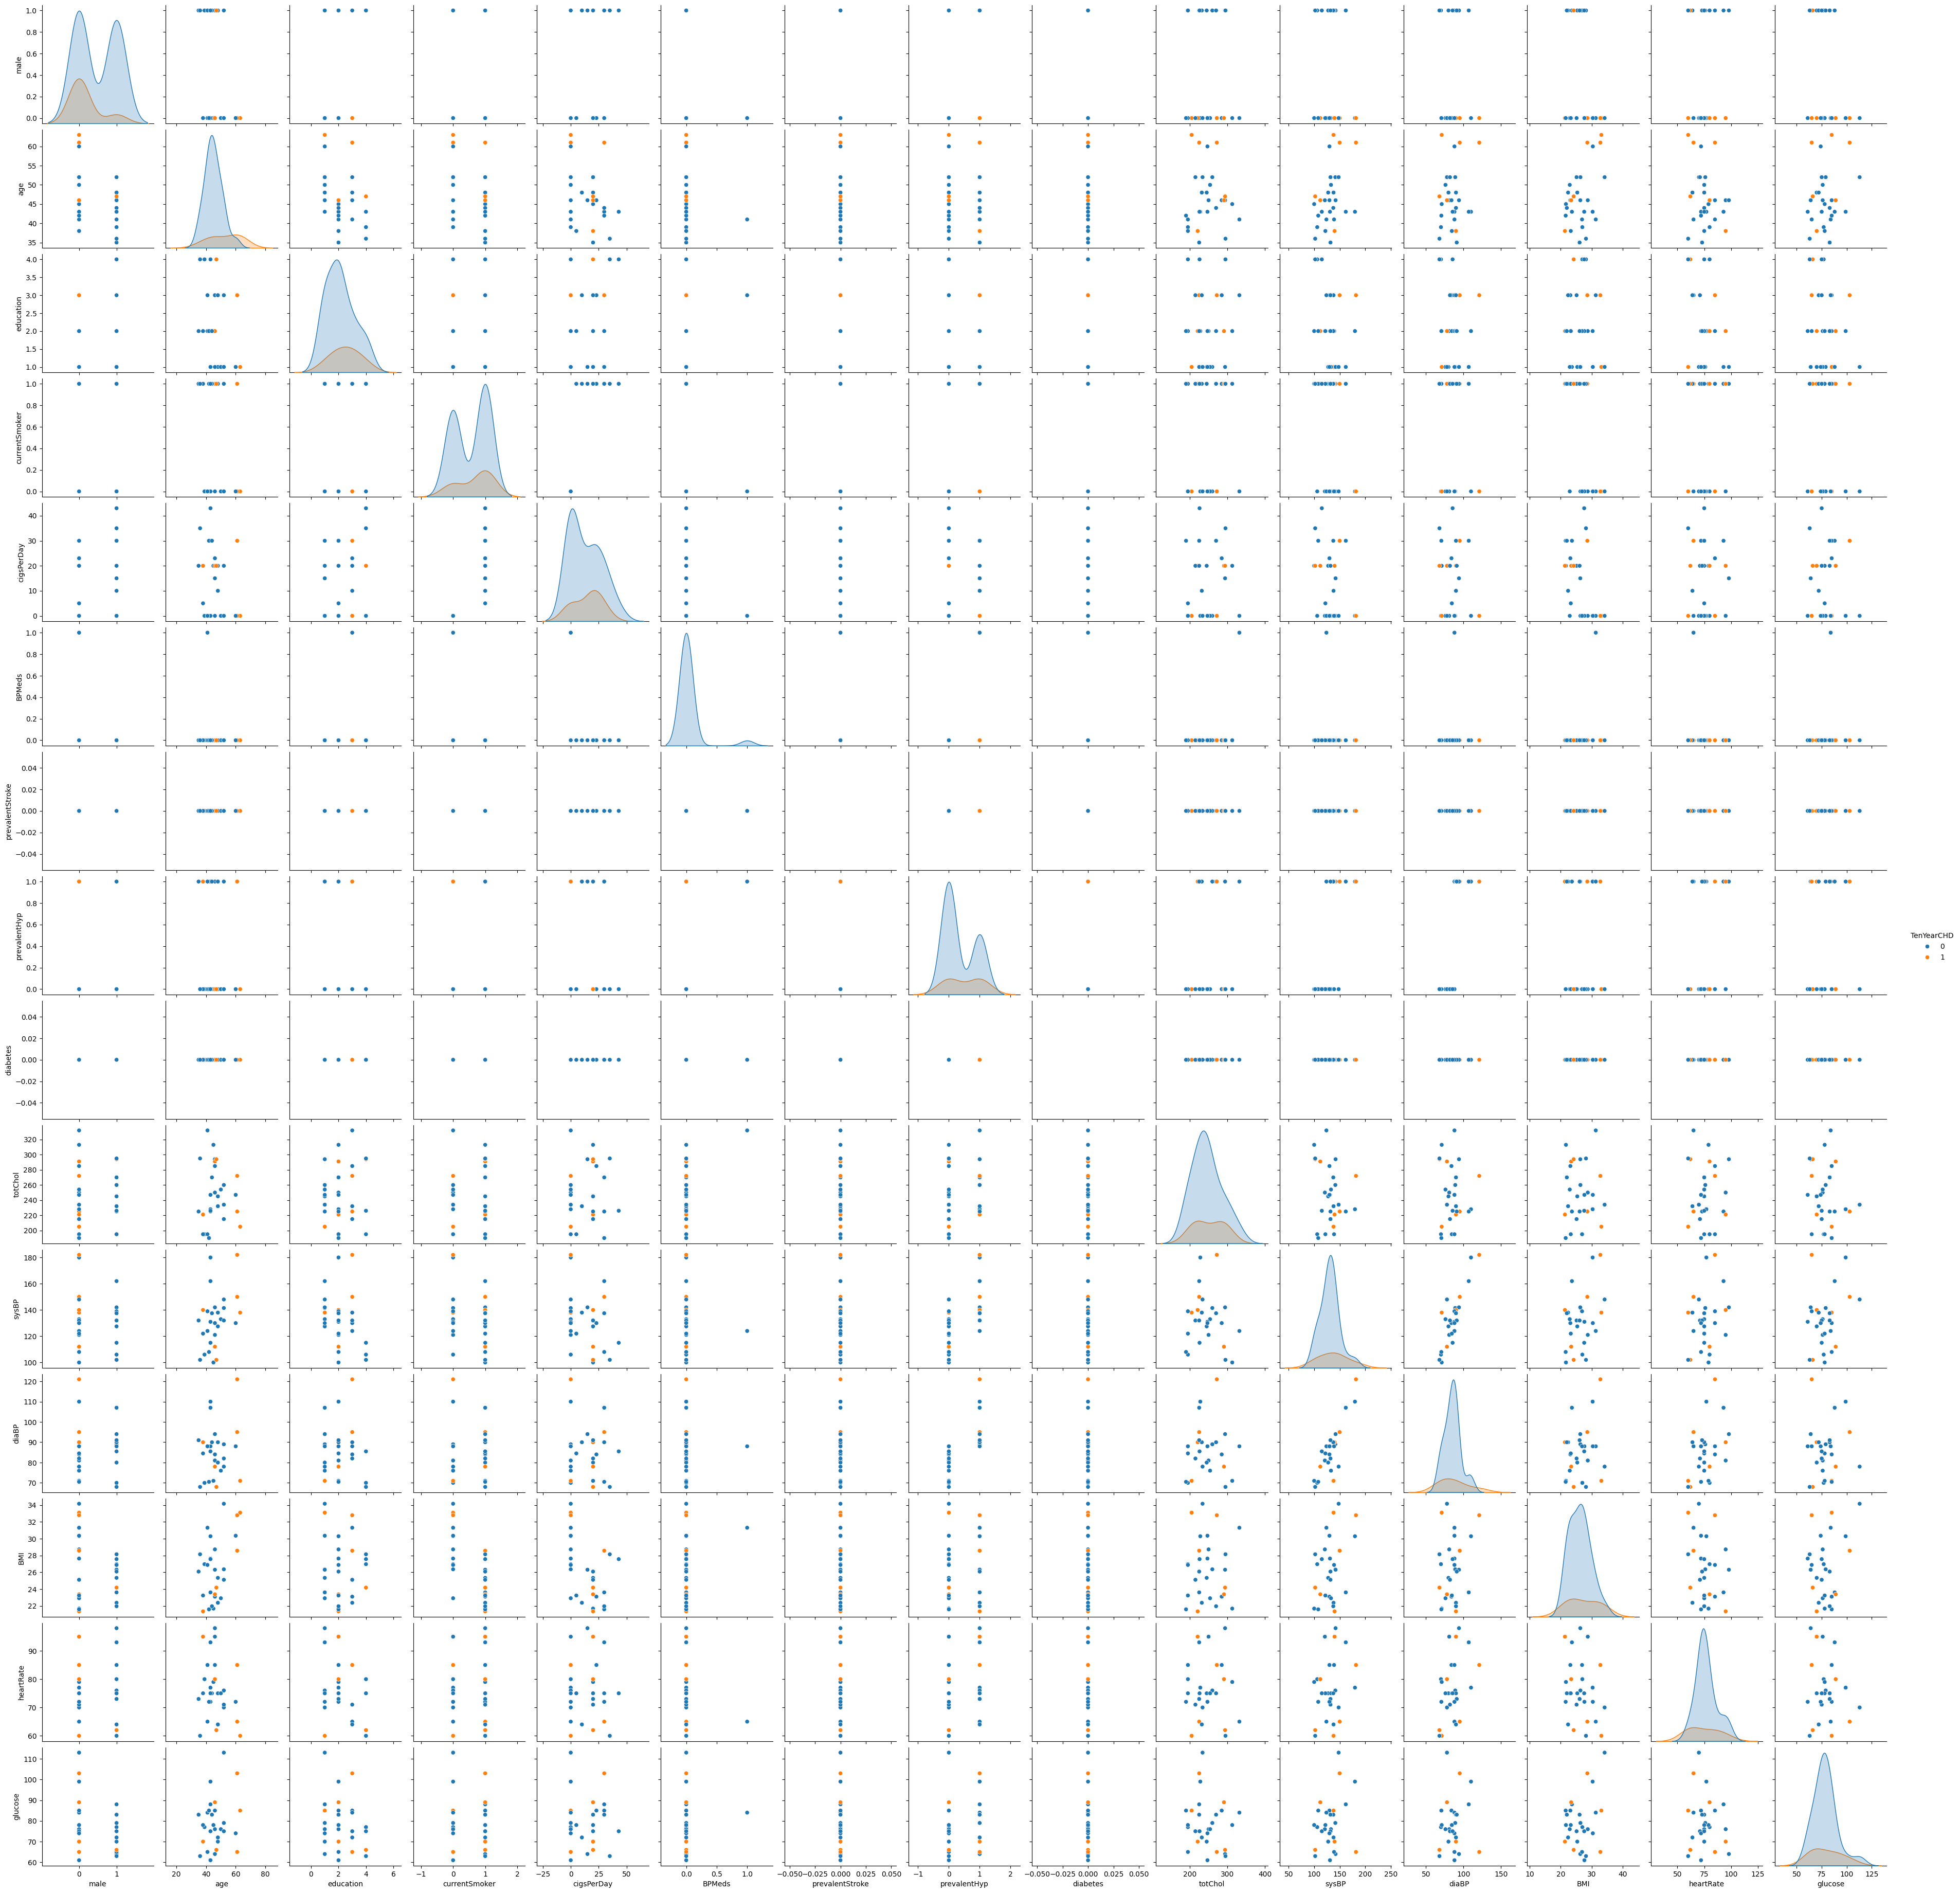

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame
sns.pairplot(data, hue='TenYearCHD')  # 'TenYearCHD' is the target variable for color-coding
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6667


In [18]:
report = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.67      0.67      0.67         6

